# Modelo preditivo de preços do mercado imobiliário

Esse projeto usa dados fictícios, encontrados na plataforma *Kaggle*: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

In [28]:
!gdown --fuzzy https://drive.google.com/file/d/1tYX4sSfoT_4x-qoqzH78nNBRzWCVopX_/view?usp=sharing -O archive.zip
!unzip archive.zip

Downloading...
From: https://drive.google.com/uc?id=1tYX4sSfoT_4x-qoqzH78nNBRzWCVopX_
To: /content/archive.zip
100% 798k/798k [00:00<00:00, 131MB/s]
Archive:  archive.zip
replace kc_house_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kc_house_data.csv       


## Carregando os dados

Antes de mais nada, vamos, através da biblioteca Pandas, importar o dataframe com todos os dados do problema!

In [29]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')

## Análise de dados

Aqui, é possível observar todos os dados desse problema: Desde o preço do imóvel, até a quantidade de andares, quantidade de banheiros...

In [30]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Agora, é de suma importância visualizar e entender quais dados não estão presentes nessa base de dados.

In [31]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Relações entre as variáveis

Agora, através é necessário entender através de algum método de correlação (nesse caso a Correlação de Pearson), quais fatores mais e menos influenciam os preços. Esses resultados são demonstrados através de um heatmap (mapa de calor).

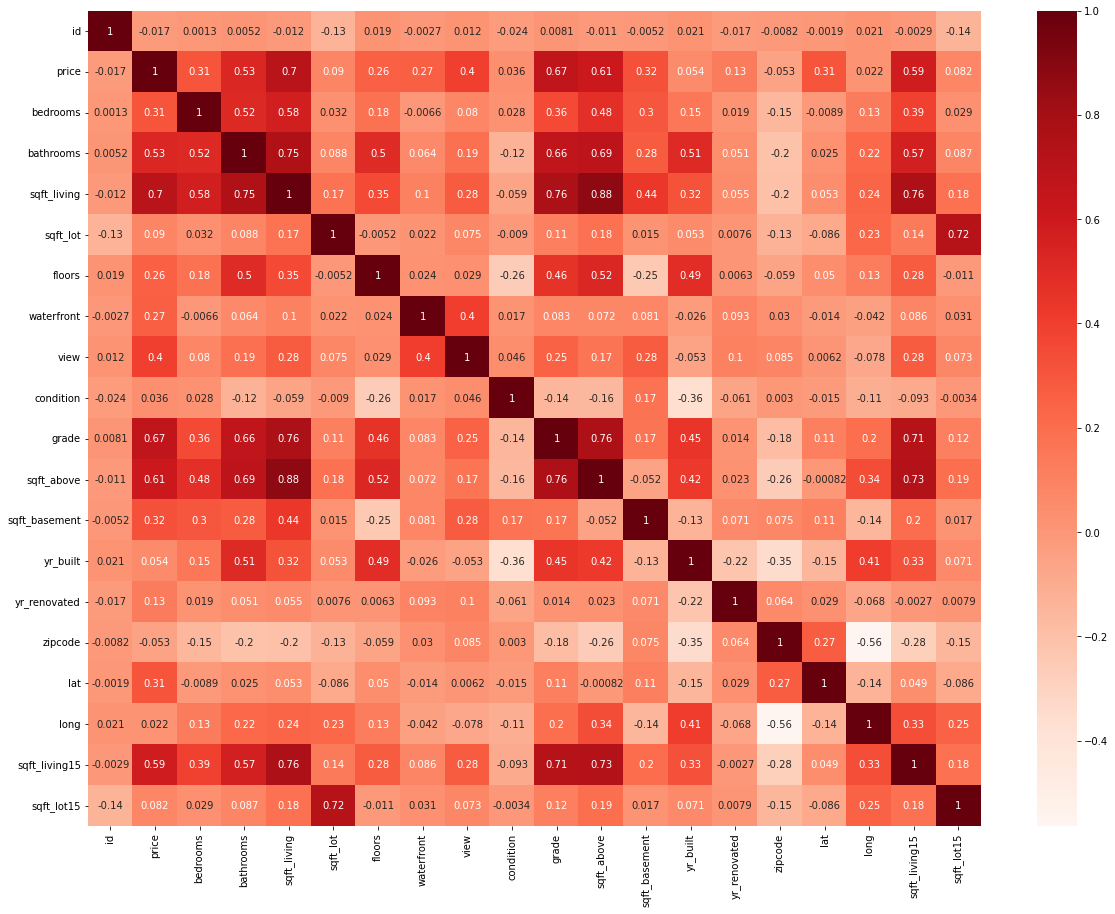

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

É possível então concluir algumas coisas: A varíavel que mais afeta o preço é a "sqft_living", com um valor de +0.7 de correlação! Ao mesmo tempo, algumas variáveis não afetam o preço, como "long".

## Pre processamento

Antes de mais nada, vamos remover a variável "id". A priori, ela não representa nada matematicamente, e pode até atrapalhar o problema!

In [34]:
df = df.drop(["id"],axis=1)

Já a variável de data, vamos dividir em 3 valores diferentes para cada data: dia, mês e ano. É mais fácil trabalhar dessa forma!

In [35]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)

Plotando os resultados, percebemos que aparentemente é uma distribuição normal, com excessão de alguns dados que distorcem a distribuição. A partir de aproximadamente 2,2 milhões de preço.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


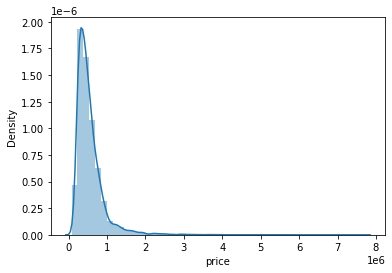

In [36]:
sns.distplot(df['price'])

Para isso, vou remover aproximadamente 1% dos dados finais. Essa parte foi encontrada empiricamente, a fim de se obter melhores resultados para o modelo. É possível observar que os preços que afetavam negativamente a distribuição nomrla foram removidos.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


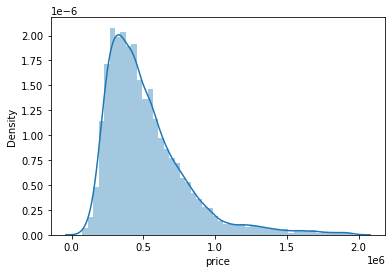

In [37]:
df = df.sort_values(['price'], ascending=False).iloc[int(len(df)*0.01):]
df.head()
sns.distplot(df['price'])

## Criando o modelo

É necessário dividir os dados nas variáveis dependentes (Y) e independentes (X). A variável independente é a que queremos encontrar o seu valor (preço) em relação às variáveis independentes (todo o resto).

In [38]:
# Creating X and Y (features and labels)
x = df.iloc[:,1:]
y = df.iloc[:,0:1]
X = x.values
Y = y.values

Vamos avaliar os modelos com base no R-Quadrado, uma das principais métricas para avaliar se uma regressão foi eficaz ou não para explicar o modelo. Quanto mais perto de 1, melhor o modelo explica todos os casos!

In [39]:
from sklearn.metrics import r2_score

### Regressão Linear

Essa é o tipo de regressão mais simples. Nela as variáveis independentes influenciam linearmente a variável dependente (preço).

R² score: 71.66289401005545


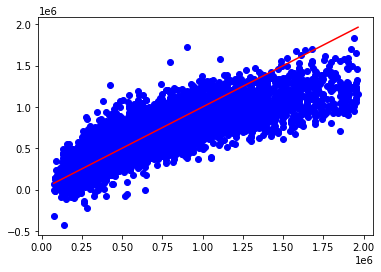

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

print(f'R² score: {r2_score(Y, lin_reg.predict(X))*100}')

predictArray_lin = lin_reg.predict(X)
plt.scatter(Y,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

Esse R-Quadrado, embora muito positivo (o modelo explica 70% dos casos), não é o melhor possível para esse problema. Vale lembrar que para **esse problema**, ele não é o melhor. Tudo depende da sua base de dados!

### Random Forest Regression

Esse método é bem mais complexo que o de regressão linear. Uma explicação sobre esse método pode ser encontrada aqui: https://towardsdatascience.com/random-forest-regression-5f605132d19d

R² score: 97.46836948843632


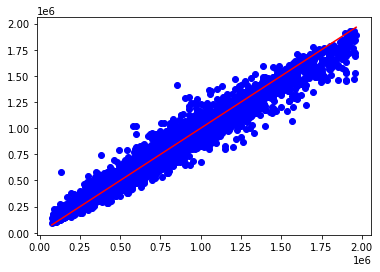

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')

predictArray_rf = rf_reg.predict(X)
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color="r")

Já com esse método de regressão, conseguimos encontrar um modelo que explica 97,4% dos casos. Para esse exercício, esse é o melhor encontrado!

## Conclusão

Para esse exercício em questão, o melhor modelo é o Random Forest Regressor. Vale lembrar que cada técnica de regressão para ser bem sucedida, é dependente da base de dados. Em alguns casos, como o da regressão linear, podem ser feitos ajustes (como ln()) para tentar explicar melhor o modelo!